# **Project Name**    - Transforming EDA Projects to Airbnb Booking Analysis Dashboards



##### **Project Type**    - Tableau Dashboard
##### **Contribution**    - Individual


# **Tableau Dashboard Link**

Tableau Dashboard Link:https://public.tableau.com/shared/9ZTXXBTYW?:display_count=n&:origin=viz_share_link

# **Problem Statement**


In the context of Airbnb operations, how can the utilisation of Tableau facilitate a comprehensive comparative examination between Chicago and New Orleans, two diverse urban environments?

This inquiry seeks to leverage Tableau's visual analytics capabilities to uncover and illustrate the shared attributes, disparities, and distinctive patterns inherent to Airbnb's presence in these cities, thus elevating the depth and insightfulness of the study.

# ***Let's Begin !***

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount the drive to google colab by running below code
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
path_chicago='/content/drive/MyDrive/Data_sets/Micro_csv_dataset/Chicago_listings.csv'
path_New_Orleans='/content/drive/MyDrive/Data_sets/Micro_csv_dataset/New Orleans_listings.csv'


# Read the dateset by using .read_csv() method
data_Chicago=pd.read_csv(path_chicago)
data_New_Orleans=pd.read_csv(path_New_Orleans)

# Add a "City" column with corresponding city names
data_Chicago['City'] = 'Chicago'
data_New_Orleans['City'] = 'New Orleans'

# Creating the Pandas dataframe by using .DataFrame() method then assing it to variable df
df_chicago=pd.DataFrame(data_Chicago)
df_new_orleans=pd.DataFrame(data_New_Orleans)

In [ ]:
# Use pd.concat() to stack df2 below df1
df_airbnb_listing = pd.concat([df_chicago, df_new_orleans], ignore_index=True)


In [ ]:
# Dataset First Look for chicago dataset
df_airbnb_listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,City
0,2384.0,https://www.airbnb.com/rooms/2384,2.023060e+13,18-06-2023,city scrape,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,You are invited to be the sole Airbnb guest in...,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/acf6b3c0-47f2...,2613,...,4.96,4.94,NaN,f,1,0,1,0,2.14,Chicago
1,7126.0,https://www.airbnb.com/rooms/7126,2.023060e+13,18-06-2023,city scrape,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,A very small studio in a wonderful neighborhoo...,"Ukrainian Village was just named ""Hottest Neig...",https://a0.muscache.com/pictures/51073/16c81c7...,17928,...,4.88,4.75,R21000075737,f,1,1,0,0,2.90,Chicago
2,755701.0,https://www.airbnb.com/rooms/755701,2.023060e+13,18-06-2023,city scrape,Rental unit in Chicago · ★4.73 · 3 bedrooms · ...,"This is a wonderful, bright, very clean and mo...","Logan Square is an official community area, hi...",https://a0.muscache.com/pictures/40393621/bb8c...,3920450,...,4.57,4.71,City registration pending,f,4,4,0,0,0.22,Chicago
3,10945.0,https://www.airbnb.com/rooms/10945,2.023060e+13,18-06-2023,city scrape,Rental unit in Chicago · ★4.64 · 2 bedrooms · ...,Beautiful first floor apartment in Historic Ol...,NaN,https://a0.muscache.com/pictures/58d1a420-a24b...,33004,...,4.98,4.62,2209984,t,7,7,0,0,0.59,Chicago
4,790934.0,https://www.airbnb.com/rooms/790934,2.023060e+13,18-06-2023,previous scrape,Rental unit in Chicago · ★4.66 · 1 bedroom · 1...,This is for the pullout sofa bed in my living ...,We are in the far north neighborhood of Chicag...,https://a0.muscache.com/pictures/83010476/8126...,2907254,...,4.44,4.68,R21000075752,f,16,0,4,12,1.08,Chicago


In [ ]:
# Dataset Rows & Columns count
df_airbnb_listing.shape

(14807, 76)

In [ ]:
# Dataset Info
df_airbnb_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14807 entries, 0 to 14806
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            14807 non-null  float64
 1   listing_url                                   14807 non-null  object 
 2   scrape_id                                     14807 non-null  float64
 3   last_scraped                                  14807 non-null  object 
 4   source                                        14807 non-null  object 
 5   name                                          14807 non-null  object 
 6   description                                   14780 non-null  object 
 7   neighborhood_overview                         10581 non-null  object 
 8   picture_url                                   14807 non-null  object 
 9   host_id                                       14807 non-null 

In [ ]:
# Dataset Columns
df_airbnb_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

**Variables Description**

id: Unique ID assigned to each listing.


---


name: Name of the listing.


---


host_id: Unique ID assigned to each host.


---


host_name: Name of the host.


---



neighbourhood_group: Group or region where the
listing is located.


---


neighborhood: Neighborhood where the listing is situated.

---



latitude: Latitude range of the listing's location.


---


longitude: Longitude range of the listing's location.


---


room_type: Type of listing, categorized as "Entire home," "Private room," or "Shared room."


---


price: Price of the listing per night.


---


minimum_nights: Minimum number of nights required for booking the listing.


---


number_of_reviews: Total number of reviews received for the listing.


---


last_review: Content of the last review received for the listing.


---


reviews_per_month: Average count of reviews per month for the listing.


---


calculated_host_listing_count: Number of listings managed by the host.


---


availability_365: Availability of the listing throughout the year, measured in the number of days.


---


Note: Listing is nothing but the property of host

In [ ]:
# Using isin() method for keeping those columns which are needed and droping all columns
df_airbnb_listing = df_airbnb_listing.loc[:, df_airbnb_listing.columns.isin(['id','name','host_id','host_name','neighbourhood','neighbourhood_group_cleansed','latitude',
       'longitude','room_type','minimum_nights','price','number_of_reviews','last_review','reviews_per_month','availability_365','City','property_type','amenities'])]
df_airbnb_listing.head()


,id,name,host_id,host_name,neighbourhood,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,amenities,price,minimum_nights,availability_365,number_of_reviews,last_review,reviews_per_month,City
0,2384.0,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,"Chicago, Illinois, United States",NaN,41.78790,-87.58780,Private room in condo,Private room,"[""Paid parking garage off premises"", ""Long ter...",$129.00,3,350,220,10-06-2023,2.14,Chicago
1,7126.0,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,17928,Sarah,"Chicago, Illinois, United States",NaN,41.90166,-87.68021,Entire rental unit,Entire home/apt,"[""Long term stays allowed"", ""Window AC unit"", ...",$94.00,32,295,493,28-05-2023,2.90,Chicago
2,755701.0,Rental unit in Chicago · ★4.73 · 3 bedrooms · ...,3920450,Vas,"Chicago, Illinois, United States",NaN,41.93115,-87.71836,Entire rental unit,Entire home/apt,"[""Long term stays allowed"", ""Blender"", ""Smoke ...",$100.00,32,198,27,01-12-2022,0.22,Chicago
3,10945.0,Rental unit in Chicago · ★4.64 · 2 bedrooms · ...,33004,At Home Inn,NaN,NaN,41.91196,-87.63981,Entire rental unit,Entire home/apt,"[""Smoke alarm"", ""Fire extinguisher"", ""Essentia...",$219.00,4,94,66,07-06-2023,0.59,Chicago
4,790934.0,Rental unit in Chicago · ★4.66 · 1 bedroom · 1...,2907254,Joe,"Chicago, Illinois, United States",NaN,42.01653,-87.68788,Shared room in rental unit,Shared room,"[""Long term stays allowed"", ""Smoke alarm"", ""Fi...",$234.00,1,0,139,03-02-2020,1.08,Chicago


In [ ]:
# Dataset Describe
df_airbnb_listing.describe(include='all')

,id,name,host_id,host_name,neighbourhood,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,amenities,price,minimum_nights,availability_365,number_of_reviews,last_review,reviews_per_month,City
count,1.480700e+04,14807,1.480700e+04,14807,10582,0.0,14807.000000,14807.000000,14807,14807,14807,14807,14807.000000,14807.000000,14807.000000,12257,12257.000000,14807
unique,NaN,7116,NaN,3239,27,NaN,NaN,NaN,62,4,13335,903,NaN,NaN,NaN,1276,NaN,2
top,NaN,Rental unit in Chicago · 1 bedroom · 1 bed · 1...,NaN,Blueground,"Chicago, Illinois, United States",NaN,NaN,NaN,Entire rental unit,Entire home/apt,"[""Long term stays allowed"", ""Elevator"", ""Smoke...",$100.00,NaN,NaN,NaN,11-06-2023,NaN,Chicago
freq,NaN,513,NaN,655,5711,NaN,NaN,NaN,5715,12153,71,262,NaN,NaN,NaN,673,NaN,8024
mean,2.986544e+17,NaN,1.724163e+08,NaN,NaN,NaN,36.426726,-88.767348,NaN,NaN,NaN,NaN,15.422368,191.272709,54.789154,NaN,1.841995,NaN
std,3.727153e+17,NaN,1.611634e+08,NaN,NaN,NaN,5.947081,1.202136,NaN,NaN,NaN,NaN,34.234316,126.554705,91.251143,NaN,1.810434,NaN
min,2.384000e+03,NaN,9.710000e+02,NaN,NaN,NaN,29.897680,-90.137480,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,0.010000,NaN
25%,2.910562e+07,NaN,3.534246e+07,NaN,NaN,NaN,29.963125,-90.072134,NaN,NaN,NaN,NaN,2.000000,79.000000,2.000000,NaN,0.550000,NaN
50%,4.973069e+07,NaN,1.074344e+08,NaN,NaN,NaN,41.791259,-87.722810,NaN,NaN,NaN,NaN,3.000000,180.000000,20.000000,NaN,1.480000,NaN
75%,7.059170e+17,NaN,2.904318e+08,NaN,NaN,NaN,41.900318,-87.654525,NaN,NaN,NaN,NaN,30.000000,315.000000,70.000000,NaN,2.660000,NaN


In [ ]:
# Dataset Duplicate Value Count
df_airbnb_listing.duplicated().sum()

16

In [ ]:
# printing the shape of dataset
df_airbnb_listing.shape

(14807, 18)

In [ ]:
# Missing Values/Null Values Count
df_airbnb_listing.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood                    4225
neighbourhood_group_cleansed    14807
latitude                            0
longitude                           0
property_type                       0
room_type                           0
amenities                           0
price                               0
minimum_nights                      0
availability_365                    0
number_of_reviews                   0
last_review                      2550
reviews_per_month                2550
City                                0
dtype: int64

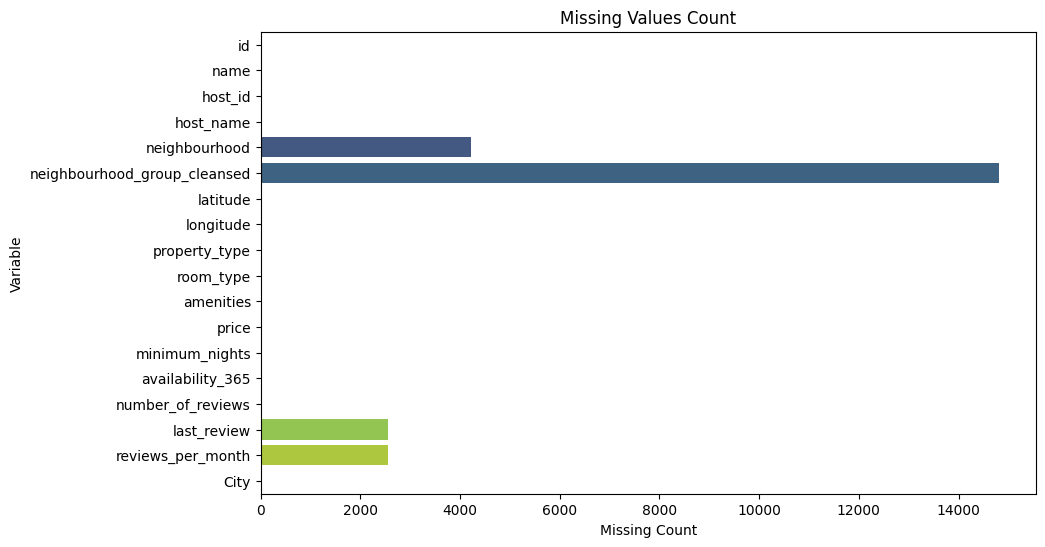

In [ ]:
# Visualizing the missing values
missing_data = df_airbnb_listing.isnull().sum().reset_index()
missing_data.columns = ['Variable', 'Missing Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Missing Count', y='Variable', data=missing_data, palette='viridis')
plt.title('Missing Values Count')
plt.xlabel('Missing Count')
plt.ylabel('Variable')
plt.show()


In [ ]:
# Droping the neighbourhood_group_cleansed column
df_airbnb_listing.drop(['neighbourhood_group_cleansed'],axis=1, inplace=True)

In [ ]:
# Checking unique values in neighbourhood column
df_airbnb_listing['neighbourhood'].unique()

array(['Chicago, Illinois, United States', nan,
       'Oak Park, Illinois, United States',
       'Chicago Heights, Illinois, United States',
       'Chicago , Illinois, United States',
       'Bucktown, Chicago, Illinois, United States',
       'Oak Lawn, Illinois, United States', 'Chicago, United States',
       'Rogers Park, Il, United States',
       'Santa Barbara, California, United States',
       'Chicago, Il, United States',
       'Harwood Heights, Illinois, United States',
       '芝加哥, Illinois, United States',
       'Evergreen Park, Illinois, United States',
       'Norridge, Illinois, United States',
       'Riverdale, Illinois, United States',
       'New Orleans, Louisiana, United States',
       'ByWater-Marigny, New Orleans, Louisiana, United States',
       'ByWater-Marigny, New Orleans , Louisiana, United States',
       'Arabi, Louisiana, United States',
       'New Orleans, Louisiana, US, Louisiana, United States',
       'New Orleans, United States', 'New Orlean

In [ ]:
# Replacing the null values with "unkown" in neighbourhood
df_airbnb_listing['neighbourhood'].fillna('Unknown', inplace=True)

# A custom function which can remove extra spaces
def handle_neighbourhood(value):
  if value=='New Orleans,, La, United States':
    value='New Orleans , La, United States'
  elif value=='芝加哥,Illinois,United States':
    value='Unknown'



  split_value= str(value).split(',')
  result=[]
  for i in split_value :
    i=i.strip()
    result.append(i)
  delimiter = ','
  str_result = delimiter.join(result)
  return str_result.strip()


df_airbnb_listing['neighbourhood_']= df_airbnb_listing['neighbourhood'].apply(handle_neighbourhood)
df_airbnb_listing['neighbourhood_'].apply(str.strip)
df_airbnb_listing['neighbourhood_'].unique()

array(['Chicago,Illinois,United States', 'Unknown',
       'Oak Park,Illinois,United States',
       'Chicago Heights,Illinois,United States',
       'Bucktown,Chicago,Illinois,United States',
       'Oak Lawn,Illinois,United States', 'Chicago,United States',
       'Rogers Park,Il,United States',
       'Santa Barbara,California,United States',
       'Chicago,Il,United States',
       'Harwood Heights,Illinois,United States',
       '芝加哥,Illinois,United States',
       'Evergreen Park,Illinois,United States',
       'Norridge,Illinois,United States',
       'Riverdale,Illinois,United States',
       'New Orleans,Louisiana,United States',
       'ByWater-Marigny,New Orleans,Louisiana,United States',
       'Arabi,Louisiana,United States',
       'New Orleans,Louisiana,US,Louisiana,United States',
       'New Orleans,United States', 'New Orleans,La,United States',
       'New orleans,Louisiana,United States',
       'Gretna,Louisiana,United States',
       'Terrytown,Louisiana,United S

In [ ]:
# droping the "neighbourhood" column
df_airbnb_listing.drop(['neighbourhood'],axis=1, inplace=True)

In [ ]:
# Calculate an estimated 'last_review' date based on 'number_of_reviews' and 'reviews_per_month'
df_airbnb_listing['last_review'].fillna('unknown', inplace=True)

In [ ]:
# replacing the null values in 'reviews_per_month' with mean value of column
df_airbnb_listing['reviews_per_month'].fillna(df_airbnb_listing['reviews_per_month'].mean(), inplace=True)
# Convert 'reviews_per_month' from float to int
df_airbnb_listing['reviews_per_month'] = df_airbnb_listing['reviews_per_month'].astype(int)


In [ ]:
# printing the unique value of price column
df_airbnb_listing['price'].unique()[0:150]

array(['$129.00', '$94.00', '$100.00', '$219.00', '$234.00', '$85.00',
       '$92.00', '$120.00', '$110.00', '$86.00', '$130.00', '$200.00',
       '$136.00', '$50.00', '$95.00', '$295.00', '$89.00', '$133.00',
       '$91.00', '$251.00', '$79.00', '$312.00', '$179.00', '$246.00',
       '$45.00', '$140.00', '$108.00', '$118.00', '$60.00', '$132.00',
       '$170.00', '$138.00', '$48.00', '$149.00', '$204.00', '$32.00',
       '$103.00', '$256.00', '$692.00', '$212.00', '$146.00', '$102.00',
       '$175.00', '$449.00', '$250.00', '$27.00', '$75.00', '$184.00',
       '$119.00', '$279.00', '$51.00', '$101.00', '$193.00', '$67.00',
       '$558.00', '$141.00', '$64.00', '$70.00', '$134.00', '$220.00',
       '$196.00', '$115.00', '$153.00', '$225.00', '$82.00', '$159.00',
       '$96.00', '$608.00', '$822.00', '$150.00', '$1,193.00', '$39.00',
       '$364.00', '$160.00', '$37.00', '$282.00', '$1,607.00', '$521.00',
       '$55.00', '$392.00', '$258.00', '$52.00', '$113.00', '$148.00',

In [ ]:
# removing the "$" and "," from price value and convert the datatype to float
df_airbnb_listing['price'] = df_airbnb_listing['price'].str.replace('$', '').str.replace(',', '').astype(float)
df_airbnb_listing = df_airbnb_listing[df_airbnb_listing['price'] > 0]

In [ ]:
# printing the unique value of price column
df_airbnb_listing['price'].unique()[0:150]

array([ 129.,   94.,  100.,  219.,  234.,   85.,   92.,  120.,  110.,
         86.,  130.,  200.,  136.,   50.,   95.,  295.,   89.,  133.,
         91.,  251.,   79.,  312.,  179.,  246.,   45.,  140.,  108.,
        118.,   60.,  132.,  170.,  138.,   48.,  149.,  204.,   32.,
        103.,  256.,  692.,  212.,  146.,  102.,  175.,  449.,  250.,
         27.,   75.,  184.,  119.,  279.,   51.,  101.,  193.,   67.,
        558.,  141.,   64.,   70.,  134.,  220.,  196.,  115.,  153.,
        225.,   82.,  159.,   96.,  608.,  822.,  150., 1193.,   39.,
        364.,  160.,   37.,  282., 1607.,  521.,   55.,  392.,  258.,
         52.,  113.,  148.,  152.,   90.,   35.,  112.,  145.,  171.,
         69.,   65.,   71.,  188.,  299.,  131.,  128.,  185.,  135.,
        125.,  155.,   84.,  209.,  174.,  104.,   25.,  106.,  105.,
        248.,  207.,   42.,  297.,  303.,  151.,  201.,  268.,   40.,
         28.,  500.,  143.,  157.,   61.,   29.,  259.,  214.,   99.,
        223.,   33.,

In [ ]:
df_airbnb_listing = df_airbnb_listing[df_airbnb_listing['availability_365'] > 0]

In [ ]:
df_airbnb_listing['id'].astype(int)

0                      2384
1                      7126
2                    755701
3                     10945
5                    863120
                ...        
14802    970848000000000000
14803    971023000000000000
14804    971622000000000000
14805    971690000000000000
14806    971756000000000000
Name: id, Length: 13088, dtype: int64

In [ ]:
df_airbnb_listing['host_id'].astype(int)

0             2613
1            17928
2          3920450
3            33004
5          4525503
           ...    
14802    442915263
14803    428276486
14804     68337970
14805     14988904
14806     33076245
Name: host_id, Length: 13088, dtype: int64

In [ ]:
# getting the description of dataset
df_airbnb_listing.describe(include='all')

,id,name,host_id,host_name,latitude,longitude,property_type,room_type,amenities,price,minimum_nights,availability_365,number_of_reviews,last_review,reviews_per_month,City,neighbourhood_
count,1.308800e+04,13088,1.308800e+04,13088,13088.000000,13088.000000,13088,13088,13088,13088.000000,13088.000000,13088.000000,13088.000000,13088,13088.000000,13088,13088
unique,NaN,6507,NaN,2900,NaN,NaN,58,4,11803,NaN,NaN,NaN,NaN,964,NaN,2,18
top,NaN,Rental unit in Chicago · 1 bedroom · 1 bed · 1...,NaN,Blueground,NaN,NaN,Entire rental unit,Entire home/apt,"[""Long term stays allowed"", ""Elevator"", ""Smoke...",NaN,NaN,NaN,NaN,unknown,NaN,Chicago,"Chicago,Illinois,United States"
freq,NaN,434,NaN,577,NaN,NaN,5195,10920,59,NaN,NaN,NaN,NaN,2201,NaN,7247,5174
mean,3.194090e+17,NaN,1.768304e+08,NaN,36.567379,-88.738851,NaN,NaN,NaN,211.372097,14.523839,216.394789,57.511767,NaN,1.439487,NaN,NaN
std,3.772443e+17,NaN,1.633556e+08,NaN,5.933647,1.199311,NaN,NaN,NaN,302.644794,35.026644,112.619412,94.285642,NaN,1.668941,NaN,NaN
min,2.384000e+03,NaN,9.710000e+02,NaN,29.897680,-90.137480,NaN,NaN,NaN,12.000000,1.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN
25%,3.161769e+07,NaN,3.654527e+07,NaN,29.963450,-90.071500,NaN,NaN,NaN,94.000000,2.000000,114.000000,2.000000,NaN,0.000000,NaN,NaN
50%,5.130275e+07,NaN,1.107147e+08,NaN,41.800975,-87.717904,NaN,NaN,NaN,145.000000,3.000000,233.000000,22.000000,NaN,1.000000,NaN,NaN
75%,7.169998e+17,NaN,3.057254e+08,NaN,41.901401,-87.653720,NaN,NaN,NaN,235.000000,30.000000,322.000000,74.000000,NaN,2.000000,NaN,NaN


In [ ]:
# printing the information of dataset
df_airbnb_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13088 entries, 0 to 14806
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 13088 non-null  float64
 1   name               13088 non-null  object 
 2   host_id            13088 non-null  int64  
 3   host_name          13088 non-null  object 
 4   latitude           13088 non-null  float64
 5   longitude          13088 non-null  float64
 6   property_type      13088 non-null  object 
 7   room_type          13088 non-null  object 
 8   amenities          13088 non-null  object 
 9   price              13088 non-null  float64
 10  minimum_nights     13088 non-null  int64  
 11  availability_365   13088 non-null  int64  
 12  number_of_reviews  13088 non-null  int64  
 13  last_review        13088 non-null  object 
 14  reviews_per_month  13088 non-null  int64  
 15  City               13088 non-null  object 
 16  neighbourhood_     130

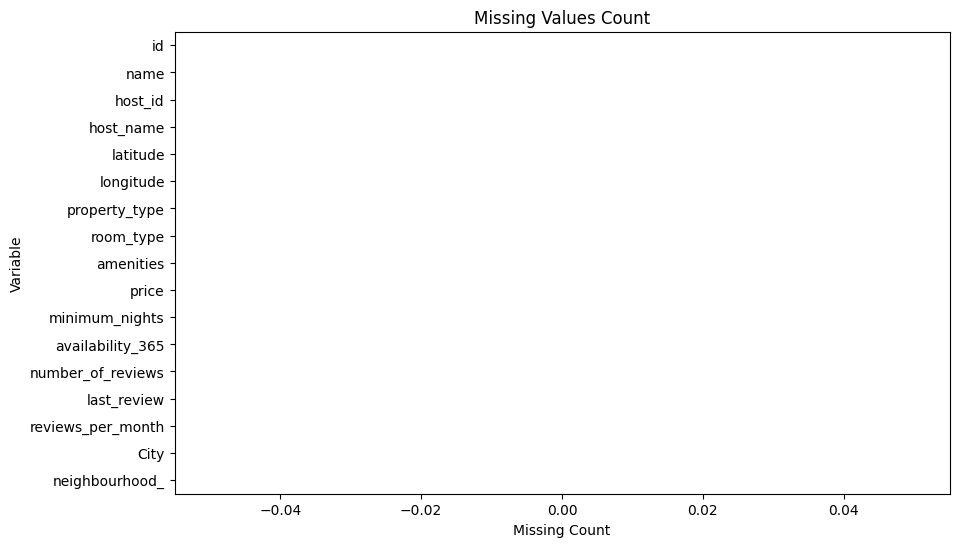

In [ ]:
# Visualizing the missing values
missing_data = df_airbnb_listing.isnull().sum().reset_index()
missing_data.columns = ['Variable', 'Missing Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Missing Count', y='Variable', data=missing_data, palette='viridis')
plt.title('Missing Values Count')
plt.xlabel('Missing Count')
plt.ylabel('Variable')
plt.show()


## Feature Extraction

In [117]:
import ast

# Function to extract number of amenities
def extract_num_amenities(amenities_str):
    amenities_list = ast.literal_eval(amenities_str)
    return len(amenities_list)

# Apply the function to the 'amenities' column
df_airbnb_listing['number_of_amenities'] = df_airbnb_listing['amenities'].apply(extract_num_amenities)

# facetgrid plotly
fig = px.histogram(df_airbnb_listing, x='City', y='number_of_amenities', color='room_type', facet_col='room_type', facet_col_wrap=2,
                category_orders={'City': df_airbnb_listing.City.value_counts().index}, histfunc='avg')
fig.show()

##  Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

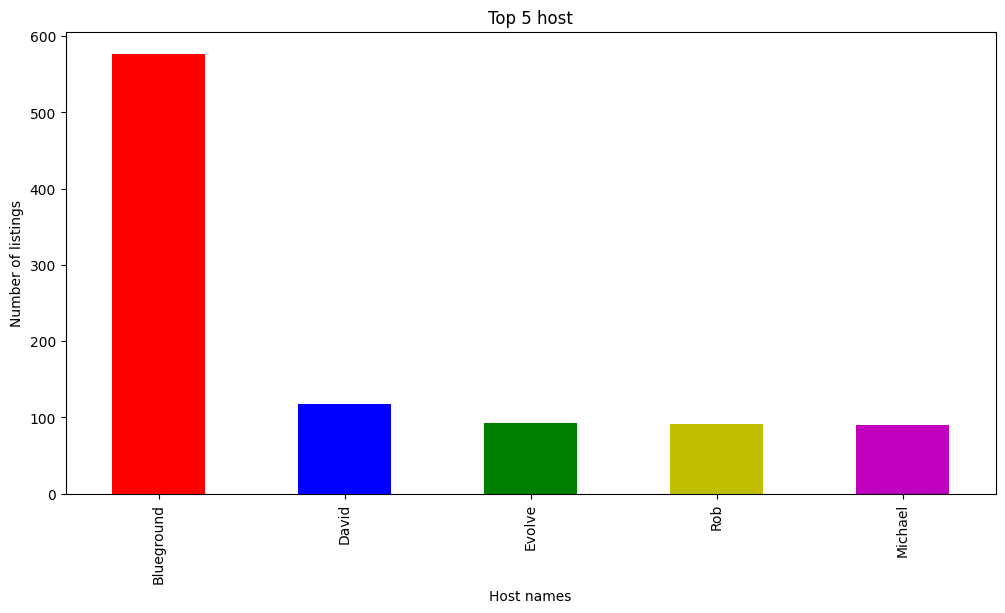

In [118]:
# Chart - visualization code
plt.figure(figsize=(12,6))
df_airbnb_listing['host_name'].value_counts()[:5].plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Top 5 host')
plt.ylabel('Number of listings')
plt.xlabel('Host names')
plt.show()

1. Why did you pick the specific chart?

  Barplot is best for visualizing the top 5 host.

2. What is/are the insight(s) found from the chart?

  Blueground and David are the top 2 host who has higher number of listings in AirBnb platform.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  AirBnb can give some discount to top hosts, So that AirBnb can develop the strong bond with hosts.

In [ ]:
# Chart - visualization code
px.box(df_airbnb_listing, x='neighbourhood_', y='price')

1. Why did you pick the specific chart?

  To get the relationship between the neighbourhood_ and price.
  It provides information about the median price (line inside the box), the interquartile range (box), and any outliers (points outside the whiskers).

2. What is/are the insight(s) found from the chart?

  In neighbourhood_ the 'New Orleans,Louisiana,US' and 'Chicago,Illinois,US' is having high price while compare to other neighbourhood_.


3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

  Airbnb can highlight the value and benefits of 'New Orleans,Louisiana,US' and 'Chicago,Illinois,US' to attract guests seeking a premium and exclusive experience.

In [ ]:
# Chart - 7 visualization code
px.box(df_airbnb_listing, x='room_type', y='price')

1. Why did you pick the specific chart?

  To get the relationship between the room_type and price.

2. What is/are the insight(s) found from the chart?

  In room type the Entire home/apt type is having high price while compare to other room type.
  It provides information about the median price (line inside the box), the interquartile range (box), and any outliers (points outside the whiskers).
3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  Airbnb can highlight the value and benefits of entire homes/apartments to attract guests seeking a premium and exclusive experience. They can also emphasize the affordability and flexibility of other room types to cater to a wider range of travelers.
  Sharing the insights with hosts can help them understand the pricing dynamics of different room types. Hosts can optimize their pricing strategies based on the insights, ensuring competitive prices for their listings. This can lead to higher host satisfaction, increased engagement, and a positive impact on the overall business.

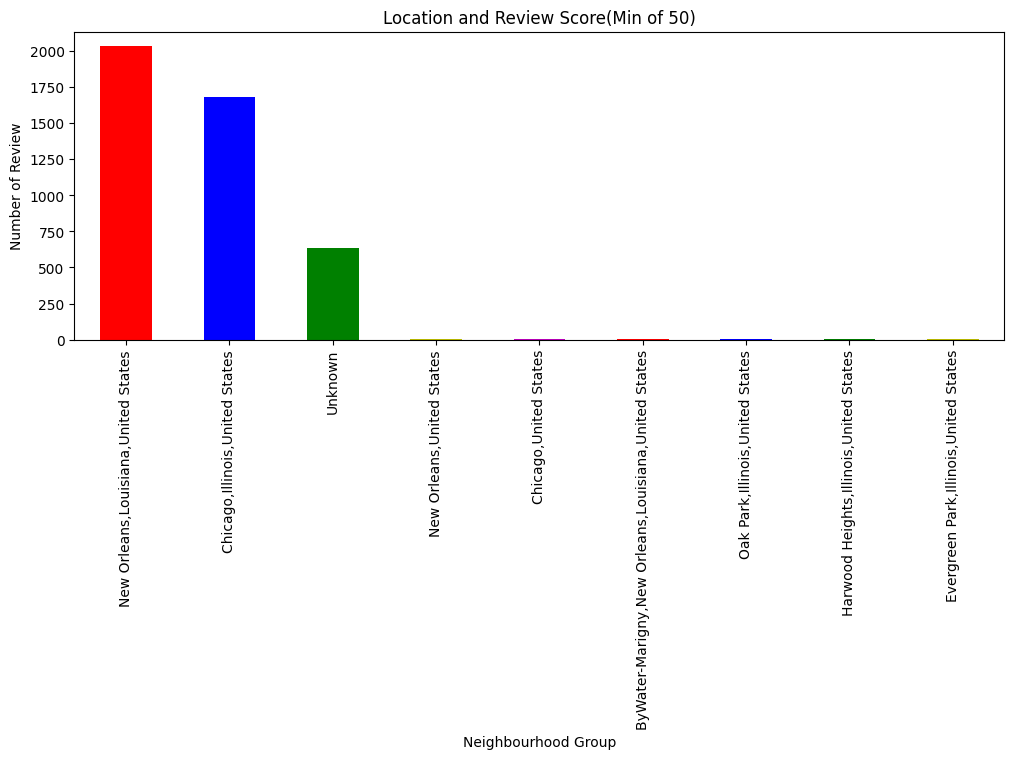

 Count of Review v/s neighbourhood group


,neighbourhood_
"New Orleans,Louisiana,United States",2033
"Chicago,Illinois,United States",1682
Unknown,633
"New Orleans,United States",3
"Chicago,United States",2
"ByWater-Marigny,New Orleans,Louisiana,United States",2
"Oak Park,Illinois,United States",1
"Harwood Heights,Illinois,United States",1
"Evergreen Park,Illinois,United States",1


In [90]:
# Chart - visualization code
fig = plt.figure(figsize=(12,4))
review_50 = df_airbnb_listing[df_airbnb_listing['number_of_reviews']>=50]
df2 = review_50['neighbourhood_'].value_counts()
df2.plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood Group')
plt.show()
print(' Count of Review v/s neighbourhood group')
pd.DataFrame(df2)

1. Why did you pick the specific chart?

  To get the relationship between count of review and group.

2. What is/are the insight(s) found from the chart?

  We observe that there a lot of reviews for 'New Orleans,Louisiana,United States' and 'Chicago,Illinois,United States' as compared to other neighbourhood groups.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  Review is the one of the important criteria with online activity these days. This gives a lot of insights to a particular place for tourist and they can swing mood when it comes to online booking. A cheap place with bad review can drive a tourist for not booking and an expensive place with nicest review can shell a tourist more than what he have thought initially.

<Axes: >

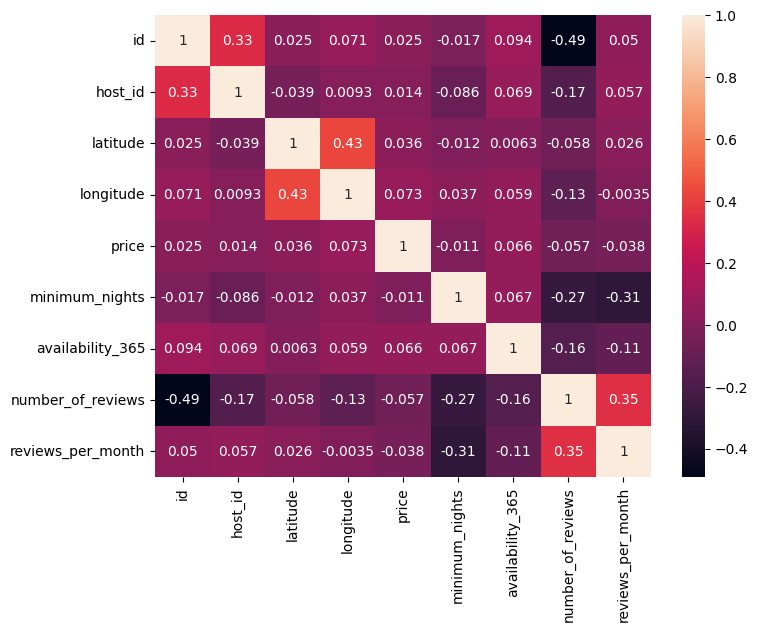

In [ ]:
# Correlation Heatmap visualization code
# Chart - 1 visualization code
#Get Correlation between different variables
corr = df_airbnb_listing.corr(method='kendall')
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)

1. Why did you pick the specific chart?

  The heatmap is used for visualizing correlation matrices in exploratory data analysis. It enables users to gain insights into the relationships between variables, identify patterns, and make informed decisions based on the correlation strengths and directions observed in the dataset.

2. What is/are the insight(s) found from the chart?

  Number of reviews and minimum nights are negativily correlated.

In [ ]:
# To save updated dataset to a CSV file
#df_airbnb_listing.to_excel('path', index=False)